# Diversity in Data Science

## Data Collection

This analysis is based on a [Twitter thread](https://twitter.com/KimmyKy2/status/1137760341654478848) that asked those who consider themselves a data scientist/analyst to share what their college major(s) was. These tweets were harvested on Friday, June 14, 2019. Since the thread is still active, one may collect additional observations if collected at a later date.  

In [120]:
import tweepy as tw
import pandas as pd
import numpy as np
import twitter_api_keys

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

target = 'KimmyKy2'

search_words = "@kimmyky2"
date_since = "2019-06-09"

I used the `tweepy` package to collect the tweets from my account since the day I started the thread. Since my account is not very active other than this particular thread, it was not hard to pick out tweets that are not related. 

In [11]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items()
#for tweet in tweets:
#    print(tweet.user.screen_name)
    
twts = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
tweet_text = pd.DataFrame(data=twts, 
                    columns=['user','text'])
tweet_text

tweet_text.to_csv(r'Data/ds_college_major_tweets_6_10_19.csv')

After saving the collected tweets into a CSV file, I manually added three columns (allowing up to three majors per response) to capture the responses. I am sure there are ways to automate this but for the given dataset, it was quicker to do it manually. (I might come back to automate this.)

In [15]:
clean_text = pd.read_csv(r'Data/ds_college_major_tweets_6_10_19_clean.csv')
print(clean_text.head())

## Data Cleaning

I was debating whether or not I should give weights to each response based on whether a data scientist has one major or three majors. For example, if they only have one major then `weight = 1`. If they have three majors then each of the majors has `weight = 1/3`. I decided to not do this, and just do counts. If a data scientist has two majors, they would be counted twice. Thus, the percentages of majors add up to more than 100%. 

In [121]:
import numpy as np
tmp1 = clean_text['clean_response'].as_matrix()
tmp2 = clean_text['clean_response_2'].as_matrix()
tmp3 = clean_text['clean_response_3'].as_matrix()
majors = np.concatenate((tmp1, tmp2, tmp3))
majors_2 = majors[pd.notnull(majors)]

# count responses with major(s)
n_responses = len(tmp1[pd.notnull(tmp1)])
print("Total number of responses with at least one major: ", n_responses)
print("Unique majors: ", np.unique(majors_2))

Total number of responses with at least one major:  300
Unique majors:  ['Accounting' 'Actuarial Science' 'Agriculture' 'Analytics' 'Anthropology'
 'Architecture' 'Atmospheric Science' 'Biochemistry' 'Biology'
 'Biomedical Science' 'Business' 'Chemistry' 'Classical Humanities'
 'Classics' 'Cognitive Science' 'Communication Sciences' 'Computer Science'
 'Computing with business' 'Cybernetic Systems' 'Data Science' 'Ecology'
 'Economics' 'Education' 'Engineering' 'English' 'Environmental Science'
 'European Studies' 'Filmmaking' 'Finance' 'Forensic Science' 'Forestry'
 'French' 'Geography' 'Global Studies' 'Health Science' 'History'
 'Human Services' 'IT' 'Integrated Science and Technology' 'Journalism'
 'Liberal Arts and Sciences' 'Liberal Studies' 'Linguistics' 'Management'
 'Marketing' 'Math' 'Music' 'Network Communications' 'Operations Research'
 'Optometry' 'Phamacology' 'Philosophy' 'Physics' 'Physiology'
 'Plant Science' 'Political Science' 'Psychology' 'Public Health'
 'Religion'

I decided to further group some of the above majors. 

In [122]:
import matplotlib.pyplot as plt
from collections import Counter
major_counts = Counter(majors_2)

major_df = pd.DataFrame(list(major_counts.items()), columns=['major','count'])
major_df['major_2'] = major_df['major']
major_df.loc[(major_df['major']=='Business') | (major_df['major']=='Marketing') | (major_df['major']=='Finance'), 'major_2'] = 'Business/Finance/Marketing'
major_df.loc[(major_df['major']=='English') | (major_df['major']=='French') | (major_df['major']=='Spanish'), 'major_2'] = 'Literature'
major_df.loc[major_df['major']=='Classical Humanities', 'major_2'] = 'Classics'
major_df.loc[(major_df['major']=='Analytics') | (major_df['major']=='Data Science'), 'major_2'] = 'Data Science/Analytics'
major_df.loc[major_df['major']=='Liberal Arts and Sciences', 'major_2'] = 'Liberal Studies'
major_df.loc[major_df['major']=='Sports Management', 'major_2'] = 'Management'
major_df.loc[(major_df['major']=='Atmospheric Science') | (major_df['major']=='Cognitive Science') | (major_df['major']=='Communication Sciences') | (major_df['major']=='Environmental Science') | (major_df['major']=='Forensic Science') | (major_df['major']=='Health Science') | (major_df['major']=='Plant Science') | (major_df['major']=='Social Science'), 'major_2'] = 'Other Sciences'

major_df_2 = major_df.groupby(['major_2']).sum().reset_index()

## Data Visualization

With the count for each major, I create a bar plot to show the top 15 majors that are most common among current working data scientist. 

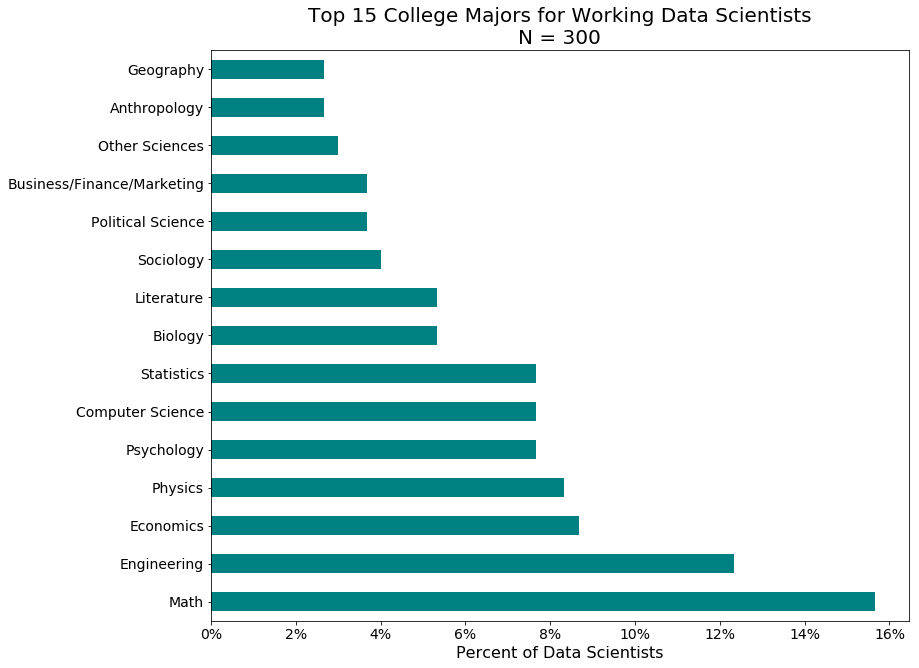

In [123]:
major_ord = major_df_2.sort_values(by='count', ascending=False)
major_ord['percent'] = major_ord['count'] / n_responses
#major_sub = major_ord.query('count>1')
major_sub = major_ord.head(15)

major_bar = major_sub.plot.barh(x='major_2', y='percent', color='#008080')
major_bar.get_legend().remove()
major_bar.set_title("Top 15 College Majors for Working Data Scientists\nN = 300", fontsize=20)
major_bar.set_ylabel('', fontsize=16)
major_bar.set_xlabel('Percent of Data Scientists', fontsize=16)
vals = major_bar.get_xticks()
major_bar.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
fig = plt.gcf()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
fig.set_size_inches(12.5, 10.5)
fig.savefig('ds_college_majors.png', dpi=100)
plt.show()

Based on the plot above, Math is the most common major among data scientists, followed by Engineering and Economics. 

I was a little surprised that Computer Science and Statistis are not higher on the list. However, this analysis shows that there is a great diversity in the data science, which, in my opinion, makes data science an even more exciting field to be in. 

A sample size of 300 is pretty small, and it is likely biased. Had the thread started by a different Twitter account, it would have received responses from a complete different network, which may result in different distributions of college majors. This thread was also only available to those with an active Twitter account and who chose to respond to the thread. So, one should keep this in mind when referencing the results from this thread. 